In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os
import time

def load_binary_data_and_labels(data_folder, img_size=(28, 28), color_mode='grayscale'):
    X = []
    y = []
    
    for idx, class_folder in enumerate(sorted(os.listdir(data_folder))):
        class_path = os.path.join(data_folder, class_folder)
        
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            # Make sure the images are loaded in their full depth (16-bit)
            img = load_img(img_path, target_size=img_size, color_mode=color_mode)
            img_array = img_to_array(img)
            X.append(img_array)
            y.append(idx)
    
    return np.array(X, dtype=np.float32), np.array(y)

In [3]:
def CNN_model(input_shape):
    model = models.Sequential()

    # Convolution 1
    model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())

    # Maxpooling 1
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Convolution 2
    model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(layers.BatchNormalization())

    # Maxpooling 2
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Convolution 3
    model.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu'))
    model.add(layers.BatchNormalization())

    # Maxpooling 3
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Flatten
    model.add(layers.Flatten())

    # FC 1
    model.add(layers.Dense(2048, activation='relu'))
    model.add(layers.Dropout(0.5))

    # FC 2
    model.add(layers.Dense(2048, activation='relu')) 
    model.add(layers.Dropout(0.5))

    # FC 3 (출력층)
    model.add(layers.Dense(1, activation='sigmoid'))  # 뉴런 개수를 1로 변경하고 활성화 함수를 sigmoid로 변경

    # 모델 컴파일
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'AUC'])
    
    return model

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models

# 데이터 경로
base_path = r'C:\Users\pc\Desktop\CNN\All_feature_binary_CNN'
train_data_folder = os.path.join(base_path, 'Train_Image')
val_data_folder = os.path.join(base_path, 'Validation_Image')
test_data_folder = os.path.join(base_path, 'Test_Image')

# 데이터 로드
X_train, y_train = load_binary_data_and_labels(train_data_folder)
X_val, y_val = load_binary_data_and_labels(val_data_folder)
X_test, y_test = load_binary_data_and_labels(test_data_folder)

# 모델 생성
input_shape = X_train[0].shape
model = CNN_model(input_shape)

# 모델 학습을 위한 배치 사이즈를 설정
batch_size = 128  # 로 고정하는게 좋을 것 같음

# 모델 학습
epochs = 50
history = model.fit(X_train, y_train, batch_size=batch_size, validation_data=(X_val, y_val), epochs=epochs)

# 시간 측정 시작
start_time = time.time()

# 모델 평가
test_loss, test_accuracy, test_auc = model.evaluate(X_test, y_test)

# 시간 측정 종료
end_time = time.time()

# 걸린 시간 계산
elapsed_time = end_time - start_time

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Test AUC:", test_auc)
print(f"Test Duration: {elapsed_time:.4f} seconds")  # 소수점 4자리까지 출력

Epoch 1/50
2500/2500 [==============================] - 29s 9ms/step - loss: 0.6898 - accuracy: 0.5367 - auc: 0.5545 - val_loss: 0.6790 - val_accuracy: 0.5461 - val_auc: 0.5799
Epoch 2/50
2500/2500 [==============================] - 23s 9ms/step - loss: 0.6784 - accuracy: 0.5561 - auc: 0.5844 - val_loss: 0.6775 - val_accuracy: 0.5537 - val_auc: 0.5868
Epoch 3/50
2500/2500 [==============================] - 23s 9ms/step - loss: 0.6751 - accuracy: 0.5608 - auc: 0.5916 - val_loss: 0.6723 - val_accuracy: 0.5663 - val_auc: 0.6001
Epoch 4/50
2500/2500 [==============================] - 23s 9ms/step - loss: 0.6713 - accuracy: 0.5663 - auc: 0.6003 - val_loss: 0.6673 - val_accuracy: 0.5694 - val_auc: 0.6078
Epoch 5/50
2500/2500 [==============================] - 23s 9ms/step - loss: 0.6643 - accuracy: 0.5786 - auc: 0.6177 - val_loss: 0.6737 - val_accuracy: 0.5634 - val_auc: 0.6001
Epoch 6/50
2500/2500 [==============================] - 23s 9ms/step - loss: 0.6586 - accuracy: 0.5870 - auc: 0.628

2500/2500 [==============================] - 23s 9ms/step - loss: 0.6205 - accuracy: 0.6305 - auc: 0.6930 - val_loss: 0.6403 - val_accuracy: 0.6233 - val_auc: 0.6863
Epoch 48/50
2500/2500 [==============================] - 23s 9ms/step - loss: 0.6204 - accuracy: 0.6303 - auc: 0.6934 - val_loss: 0.6348 - val_accuracy: 0.6231 - val_auc: 0.6866
Epoch 49/50
2500/2500 [==============================] - 23s 9ms/step - loss: 0.6207 - accuracy: 0.6303 - auc: 0.6932 - val_loss: 0.6310 - val_accuracy: 0.6257 - val_auc: 0.6869
Epoch 50/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.6249 - accuracy: 0.6258 - auc: 0.6880
Test Loss: 0.6248776316642761
Test Accuracy: 0.6257500052452087
Test AUC: 0.688037097454071
Test Duration: 4.8541 seconds


1250/1250 [==============================] - 2s 2ms/step


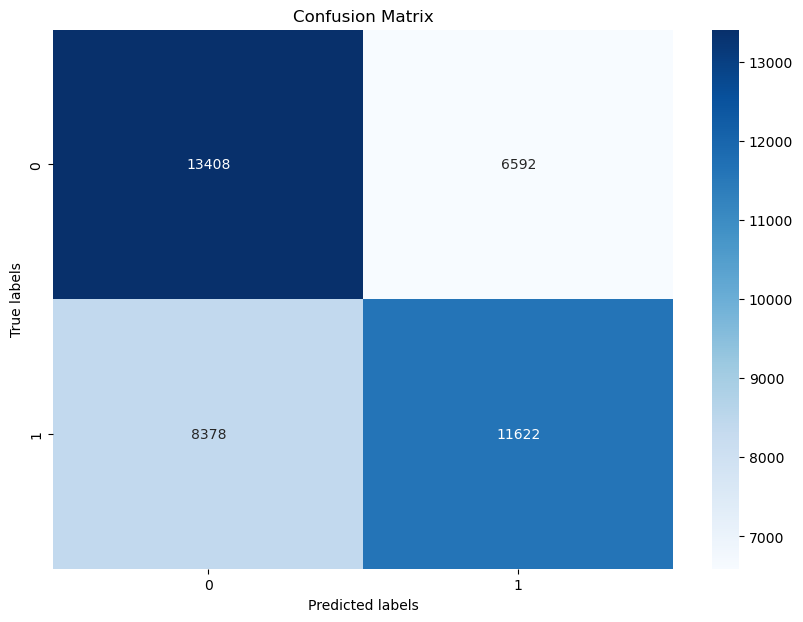

In [5]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Predict labels using the test data
y_pred = model.predict(X_test)
y_pred_labels = np.where(y_pred > 0.5, 1, 0)  # This assumes a binary classification with threshold 0.5

# 2. Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)

# 3. Visualize the confusion matrix
plt.figure(figsize=(10,7))

# Using seaborn to visualize the matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()